# AIN313 - Machine Learning Lab.

**Assignment 1**

**Diesase Detection on X-Ray Images**

**Instructor: **Erkut Erdem

**TA:** Sibel Kapan


## Student Information

Please fill the informations!

Name Surname: Zeynep Hafsa Dilmaç

Student ID: 21992905

In [13]:
#some important libraries
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [3]:
#I connected drive to read zip file properly
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#unzipping
#!unzip chest_xray.zip

In [4]:
#Canny algorithm for training
def CannyFunction(img):
  t_lower=15
  t_upper=120
  edge=cv2.Canny(img,t_lower,t_upper)
  return edge.flatten()/255.

In [5]:
#Gabor algorith for training
def GaborFunction(resized):
  ksize=20
  g_kernel=cv2.getGaborKernel((ksize,ksize),4.0,np.pi/16,10.0,0.5,0,ktype=cv2.CV_32F)
  g_kernel/=1.5*g_kernel.sum()
  img=cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)
  filteredimg=cv2.filter2D(img,cv2.CV_8UC3,g_kernel)
  return filteredimg.flatten()/255.

In [79]:
#In this step,In this step, I read the data from the paths and saved it. I also read the data separately and saved their tags to label
# them while saving.The labels I used were "0" for covid patients, "1" for normal individuals, and "2" for pneumonia patients.
#I also created three train lists. The first one saves the data as it is, the second one applies and saves the Canny filter, and
# the last one applies the Gabor filter and saves.This way, I will be able to individually control how much effect the filters have.
path1="drive/MyDrive/chest_xray/train/covid"
path2="drive/MyDrive/chest_xray/train/normal"
path3="drive/MyDrive/chest_xray/train/pneumonia"
traincovid=os.listdir(path1)
trainnormal=os.listdir(path2)
trainp=os.listdir(path3)
dim=64 #at first size 32, then 64
imagedict=[]
cannytrainlist=[]
gabortrainlist=[]
for i in traincovid:
  img=cv2.imread(os.path.join(path1,i))
  imgres=cv2.resize(img,(dim,dim))
  liste=[];liste1=[];liste2=[]
  liste.append(imgres)
  liste.append(0);imagedict.append(liste)
  liste1.append(CannyFunction(imgres))
  liste1.append(0);cannytrainlist.append(liste1)
  liste2.append(GaborFunction(imgres))
  liste2.append(0);gabortrainlist.append(liste2)
for i in trainnormal:
  img=cv2.imread(os.path.join(path2,i))
  imgres=cv2.resize(img,(dim,dim))
  liste=[];liste1=[];liste2=[]
  liste.append(imgres)
  liste.append(1);imagedict.append(liste)
  liste1.append(CannyFunction(imgres))
  liste1.append(1);cannytrainlist.append(liste1)
  liste2.append(GaborFunction(imgres))
  liste2.append(1);gabortrainlist.append(liste2)
for i in trainp:
  img=cv2.imread(os.path.join(path3,i))
  imgres=cv2.resize(img,(dim,dim))
  liste=[];liste1=[];liste2=[]
  liste.append(imgres)
  liste.append(2);imagedict.append(liste)
  liste1.append(CannyFunction(imgres))
  liste1.append(2);cannytrainlist.append(liste1)
  liste2.append(GaborFunction(imgres))
  liste2.append(2);gabortrainlist.append(liste2)

In [80]:
#test images
#I applied and recorded all the operations I applied for the train data for the test data.
patht0="drive/MyDrive/chest_xray/test/covid"
patht1="drive/MyDrive/chest_xray/test/normal"
patht2="drive/MyDrive/chest_xray/test/pneumonia"
testcovid=os.listdir(patht0)
testnormal=os.listdir(patht1)
testp=os.listdir(patht2)
testdict=[]
cannytestlist=[]
gabortestlist=[]
for i in testcovid:
  img=cv2.imread(os.path.join(patht0,i))
  imgres=cv2.resize(img,(dim,dim))
  liste=[];liste1=[];liste2=[]
  liste.append(imgres)
  liste.append(0);testdict.append(liste)
  liste1.append(CannyFunction(imgres))
  liste1.append(0);cannytestlist.append(liste1)
  liste2.append(GaborFunction(imgres))
  liste2.append(0);gabortestlist.append(liste2)
for i in testnormal:
  img=cv2.imread(os.path.join(patht1,i))
  imgres=cv2.resize(img,(dim,dim))
  liste=[];liste1=[];liste2=[]
  liste.append(imgres)
  liste.append(1);testdict.append(liste)
  liste1.append(CannyFunction(imgres))
  liste1.append(1);cannytestlist.append(liste1)
  liste2.append(GaborFunction(imgres))
  liste2.append(1);gabortestlist.append(liste2)
for i in testp:
  img=cv2.imread(os.path.join(patht2,i))
  imgres=cv2.resize(img,(dim,dim))
  liste=[];liste1=[];liste2=[]
  liste.append(imgres)
  liste.append(2);testdict.append(liste)
  liste1.append(CannyFunction(imgres))
  liste1.append(2);cannytestlist.append(liste1)
  liste2.append(GaborFunction(imgres))
  liste2.append(2);gabortestlist.append(liste2)

In [9]:
#this is my knn function
def myknn(imagedict,testmatrisi,k):
  newdict=[]
  for i in imagedict:
    matrisfarkı=np.sum(np.abs(i[0]-testmatrisi))
    new=[]
    new.append(matrisfarkı);new.append(i[1])
    newdict.append(new)
  newdict.sort(key = lambda x: x[0])
  liste=[]
  a=0;b=1;c=2
  for i in range(k):
    liste.append(newdict[i][1])
  res0=0
  res1=0
  res2=0
  for i in liste:
    if i==0:
      res0+=1
    elif i==1:
      res1+=1
    else:
      res2+=1
  if res0>=res1 and res0>=res2:
    return a
  elif res1>=res0 and res1>=res2:
    return b
  else:
    return c

In [52]:
#this is my weighted knn
def myweightedknn(imagedict,testmatrisi,k):
  newdict=[]
  for i in imagedict:
    matrisfarkı=np.sum(np.abs(i[0]-testmatrisi))
    new=[]
    new.append(matrisfarkı);new.append(i[1])
    newdict.append(new)
  newdict.sort(key = lambda x: x[0])
  freqcovid=0
  freqnormal=0
  freqpneu=0
  for i in range(k):
    if(newdict[i][1]==0):  #covid
      freqcovid+=1/newdict[i][0]
    if(newdict[i][1]==1):  #normal
      freqnormal+=1/newdict[i][0]
    if(newdict[i][1]==2):  #pneumonia
      freqpneu+=1/newdict[i][0]
  result=0
  if(freqnormal>freqcovid and freqnormal>freqpneu):
    result=1
  elif(freqpneu>freqcovid and freqpneu>freqnormal):
    result=2
  return result

In [118]:
#knn algoritmalarını dene
#hiçbir filtreleme yapmadan 3 tane k değerinde ve 2 knn algoritmasında deneyelim
#burda ise farklı k değerleriyle iki knn algoritmasında olan test datalarını test ettim
actual=[]
predicted=[]
for i in gabortestlist:
  actual.append(i[1])
  predicted.append(myweightedknn(gabortrainlist,i[0],7))
print(actual)
print(predicted)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

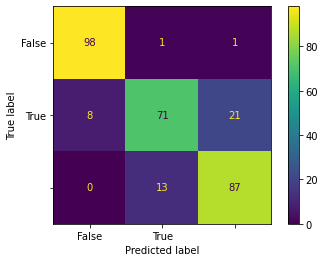

In [119]:
#confusion matrix for test images
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [120]:
#accuracy, precision, recall
# Print the precision and recall, among other metrics
print(accuracy_score(actual,predicted))
print(metrics.classification_report(actual,predicted, digits=3))

0.8533333333333334
              precision    recall  f1-score   support

           0      0.925     0.980     0.951       100
           1      0.835     0.710     0.768       100
           2      0.798     0.870     0.833       100

    accuracy                          0.853       300
   macro avg      0.853     0.853     0.851       300
weighted avg      0.853     0.853     0.851       300



In [ ]:
#If we need to interpret the results, we see that the Gabor filter gave us better results, but the Canny function did not give good results,
# especially when the size is 64.
#When we examine according to the k value, we see that the results do not change much. This is probably because there is not much difference between them.
# If we had tested much more k values, we could have seen big changes.When we look at the state before using the Canny and Gabor algorithms,
# we see that we generally reach lower accuracy than the algorithms. The reason for this is that we cannot make a correct comparison without passing
# some filters on the pictures and closing some imperfections. But in general, a maximum of 80% accuracy has been achieved with these algorithms.
# This is an indication that we need better or extra filtering etc algorithms.
#When we look at an example for which we did not get any correct results, we see that the picture is crooked. Of course, this does not allow us the right result.